In [16]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [17]:
import utils
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [20]:
data = pd.read_csv('../data/mnist_digits.csv')

train_size = .8
valid_size = .1

X_train, y_train, X_test, y_test, X_valid, y_valid = utils.train_test_valid_split(data, 
                                                                            train_size = train_size, 
                                                                            valid_size = valid_size, 
                                                                            random_state = 0)

print(f'Training data - {X_train.shape[1]} samples ({train_size*100}%)\n -')
print(f'Validation data - {X_valid.shape[1]} samples ({valid_size*100}%)\n -')
print(f'Training data - {X_test.shape[1]} samples ({round((1-(valid_size+train_size))*100)}%)')

Training data - 33600 samples (80.0%)
 -
Validation data - 4200 samples (10.0%)
 -
Training data - 4200 samples (10%)


In [21]:
from classes.Net import Net

net = Net(random_state = 0)

n_classes = 10

net.add_layer(784, 32, 'sigmoid')
net.add_layer(32, 10, 'sigmoid')
net.add_layer(10, n_classes, 'softmax')

learning_rate = 1
epochs = 5
batchsize = 64

net.fit(X_train, y_train, X_valid, y_valid, 
        n_classes = n_classes, 
        batchsize = batchsize, 
        epochs = epochs, 
        learning_rate = learning_rate)


Epoch 1 Iteration 0/2625
Accuracy: 0.094
Loss: 2.5171325329828402
-
Epoch 1 Iteration 25/2625
Accuracy: 0.283
Loss: 2.103667802816447
-
Epoch 1 Iteration 50/2625
Accuracy: 0.395
Loss: 1.7856275447392964
-
Epoch 1 Iteration 75/2625
Accuracy: 0.582
Loss: 1.2255329623334625
-
Epoch 1 Iteration 100/2625
Accuracy: 0.686
Loss: 1.1923506917484088
-
Epoch 1 Iteration 125/2625
Accuracy: 0.762
Loss: 1.023073089031056
-
Epoch 1 Iteration 150/2625
Accuracy: 0.783
Loss: 0.6915318315116141
-
Epoch 1 Iteration 175/2625
Accuracy: 0.787
Loss: 0.5696012948291759
-
Epoch 1 Iteration 200/2625
Accuracy: 0.812
Loss: 0.7750726331458018
-
Epoch 1 Iteration 225/2625
Accuracy: 0.84
Loss: 0.617388174966981
-
Epoch 1 Iteration 250/2625
Accuracy: 0.841
Loss: 0.5964584374873872
-
Epoch 1 Iteration 275/2625
Accuracy: 0.843
Loss: 0.4686851623130062
-
Epoch 1 Iteration 300/2625
Accuracy: 0.849
Loss: 0.507446929094637
-
Epoch 1 Iteration 325/2625
Accuracy: 0.855
Loss: 0.5557811956060414
-
Epoch 1 Iteration 350/2625
Acc

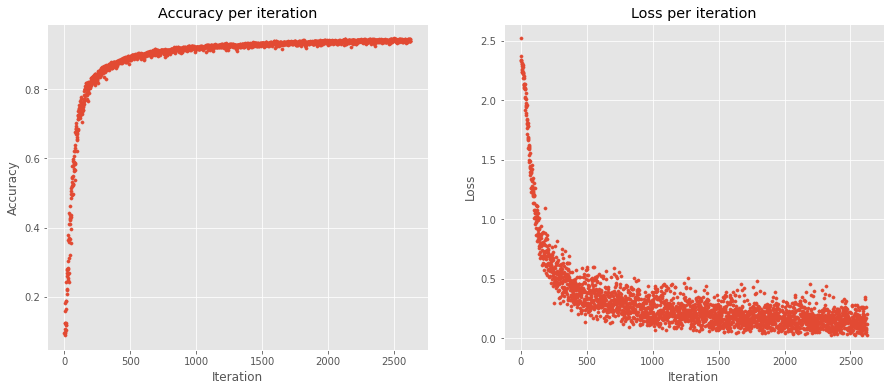

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

ax1.scatter([i for i in range(len(net.acc_history))], list(net.acc_history), s = 10)
ax1.set_title('Accuracy per iteration')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Accuracy')

ax2.scatter([i for i in range(len(net.loss_history))], list(net.loss_history), s = 10)
ax2.set_title('Loss per iteration')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Loss')

plt.show()


In [23]:
predictions = utils.get_all_predictions(net, X_test, y_test)
wrong_predictions = [(predicted, label, x) for predicted, label, x in predictions if predicted != label]
right_predictions = [(predicted, label, x) for predicted, label, x in predictions if predicted == label]

In [24]:
print(f'Test set accuracy: {round(net.score(X_test, y_test), 2)*100}%')

Test set accuracy: 94.0%


Prediction:  8
Label:  1


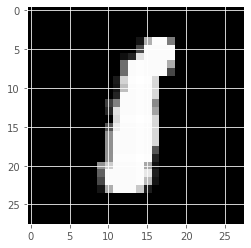

Prediction:  5
Label:  9


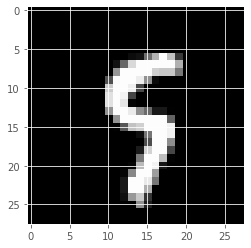

Prediction:  3
Label:  5


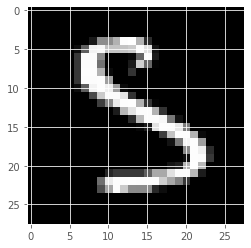

Prediction:  9
Label:  7


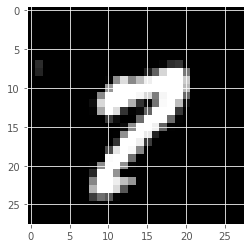

Prediction:  7
Label:  3


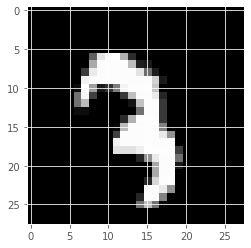

Prediction:  4
Label:  9


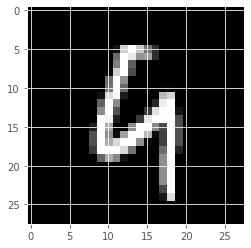

Prediction:  8
Label:  9


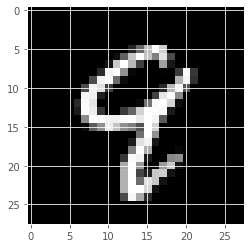

Prediction:  6
Label:  2


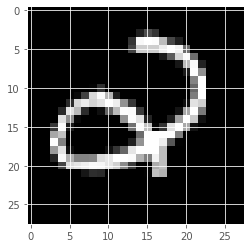

Prediction:  4
Label:  8


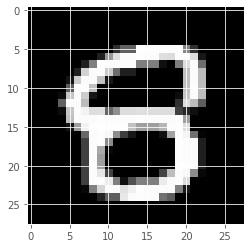

Prediction:  4
Label:  9


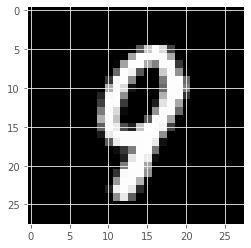

In [25]:
for prediction, label, x in wrong_predictions[:10]:
    print('Prediction: ', prediction)
    print('Label: ', label)
    plt.imshow(x.reshape((28,28)) * 255)
    plt.gray()
    plt.show()